## Getting some figures for probes impedances `20200808r`

In [17]:
import glob
import pandas as pd
import numpy as np

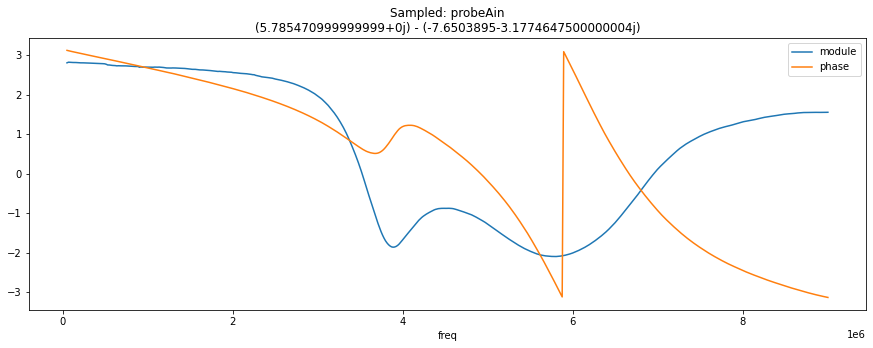

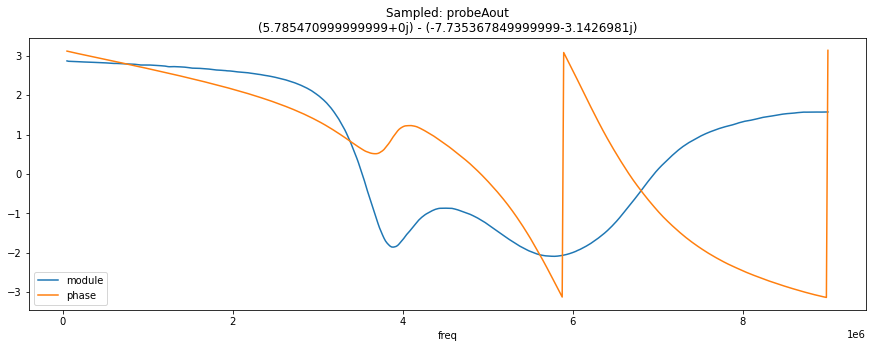

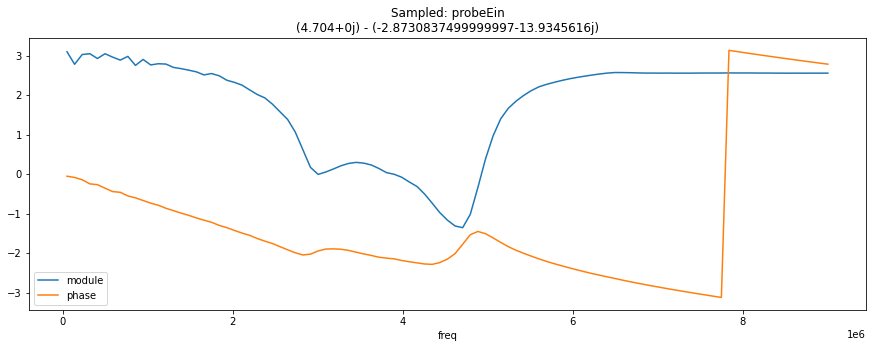

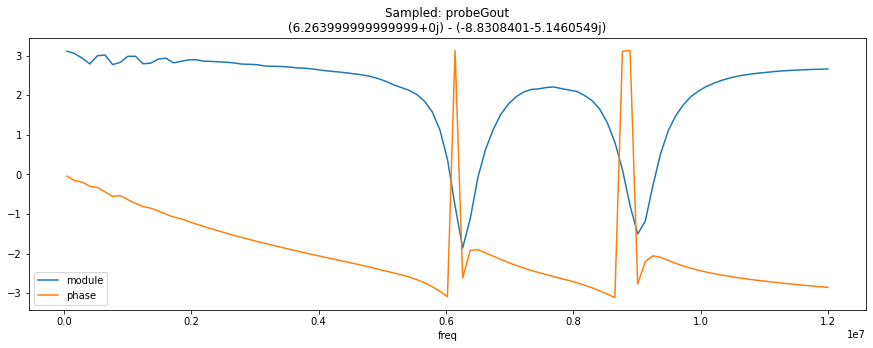

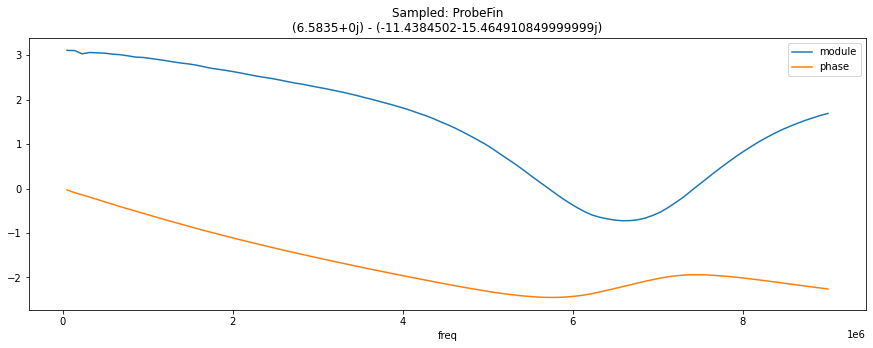

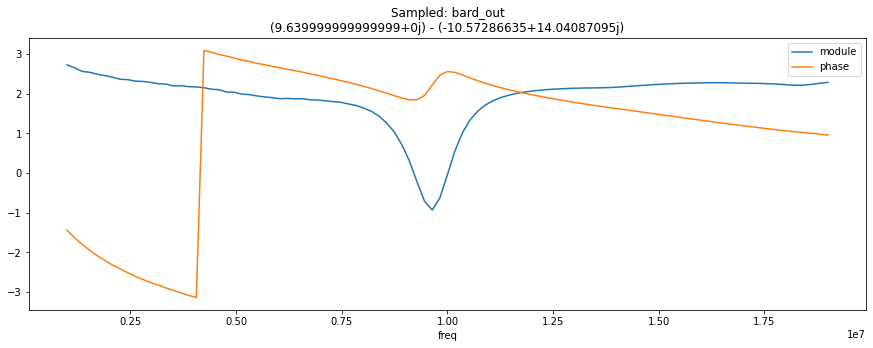

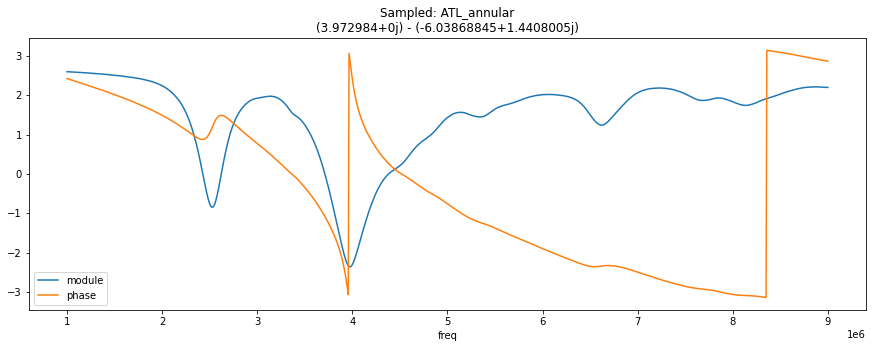

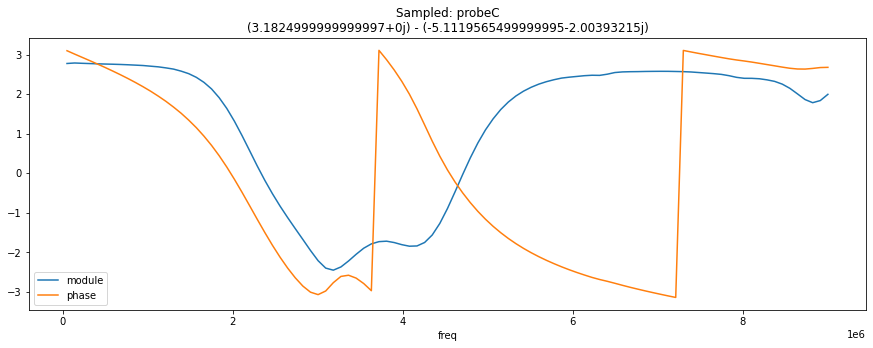

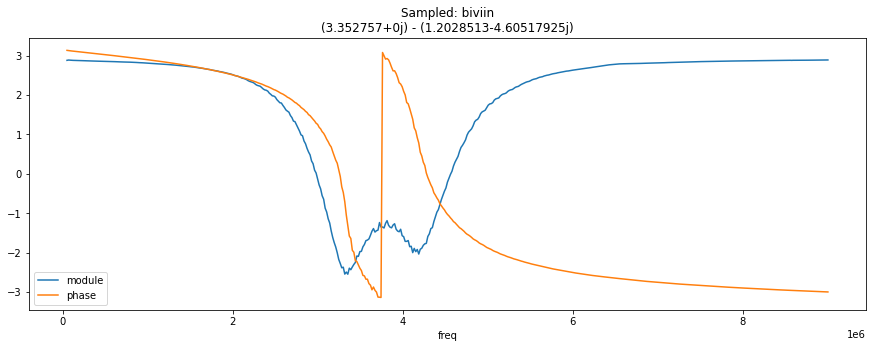

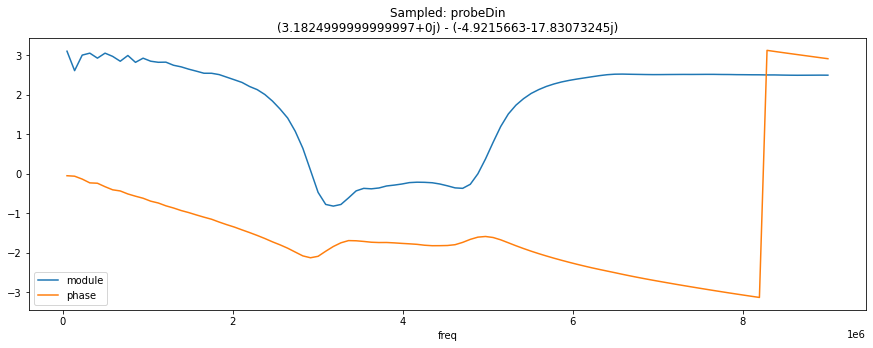

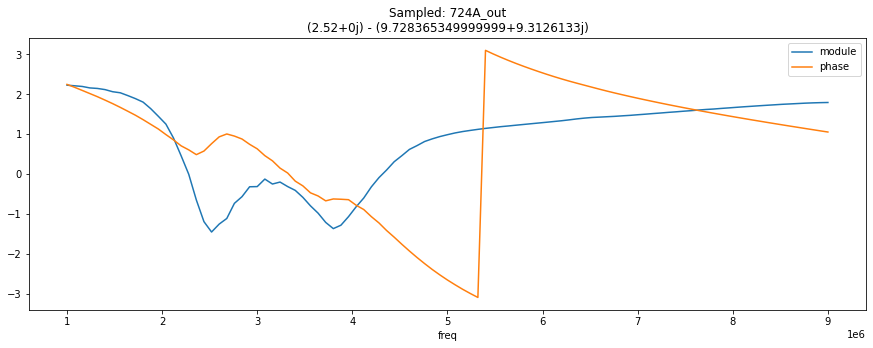

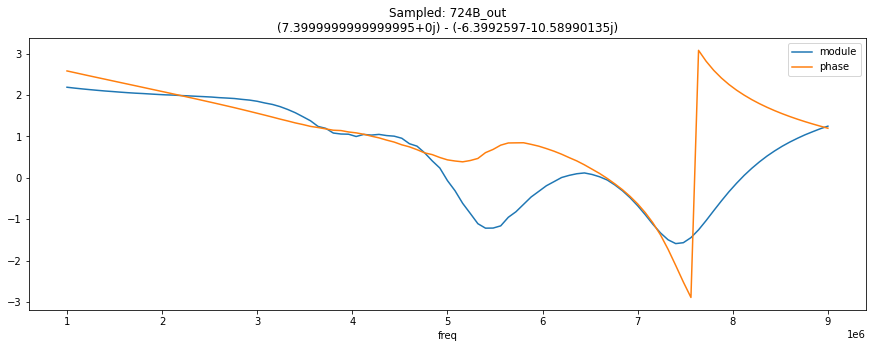

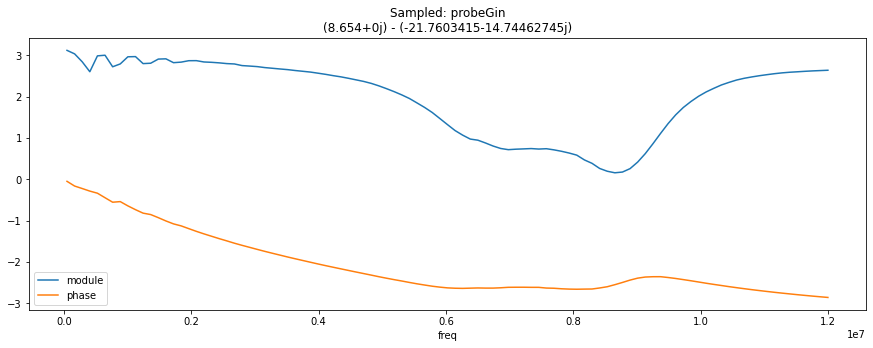

In [52]:
for name in glob.glob('s1p/*.s1p'):
    df = pd.read_csv(name,sep =" ")
    name = name.split('/')[-1].split(".")[0]
    df = df.drop(['RI', 'R','50'], axis=1)
    df.columns =["freq","Re","Im"]
    df["complex"] = 50.0*(df.Re + 1j*df.Im)
    df["phase"] = df.complex.apply(lambda x : (np.angle(x, deg=False) ))
    df["module"] = df.complex.apply(lambda x : 2*np.pi*(np.abs(x)/50.0 ) - np.pi)
    V = (df[df.module == df.module.min()])
    f, val = V.iloc[0].freq, V.iloc[0].complex
    fig = df.plot(x="freq",y=["module","phase"],figsize=(15,5),title="Sampled: "+name+"\n"+str(f/1E6)+" - "+str(val))
    fig.get_figure().savefig("images/"+name+".jpg")
    df

In [47]:
V.freq

323    5785471
Name: freq, dtype: int64

In [48]:
V

,freq,Re,Im,complex,phase,module
323,5785471,-0.153008,-0.063549,-7.650390-3.177465j,-2.747938,-2.100594


In [51]:
V.freq

(5785471+0j)